In [1]:
# Importar librerías
import numpy as np
import random as r
import time as time
import matplotlib.pyplot as plt
import matplotlib

# Cubo de Rubik 3x3

In [2]:
#Calcula la suma de las varianzas de los colores en cada cara, un cubo armado debería entregar cero.
def energia1(cubo):
  valor=0
  for i in range(6):
    aux=[]
    for j in range(3):
      for k in range(3):
        aux.append(cubo[j][k+3*i])
    valor+=np.var(aux)
  return valor

def energia2(cubo):
  valor=0
  for i in range(6):
    for j in range(3):
      for k in range(3):
        if not cubo[j][k+3*i]==i+1:
          valor+=1
  return valor

In [3]:
# Rotaciones
# Operaciones básicas
def Fder(M):
  aux=M[2,5],M[1,5],M[0,5],M[2,6],M[1,6]
  M[2,5],M[1,5],M[0,5],M[2,6],M[1,6] = M[2,17],M[2,16],M[2,15],M[2,8],M[2,7]
  M[2,17],M[2,16],M[2,15],M[2,8],M[2,7] =  M[0,9],M[1,9],M[2,9],M[0,8],M[1,8]
  M[0,9],M[1,9],M[2,9],M[0,8],M[1,8] = M[2,0],M[2,1],M[2,2],M[0,6],M[0,7]
  M[2,0],M[2,1],M[2,2],M[0,6],M[0,7] = aux
  return M

def Fizq(M):
  aux=M[2,5],M[1,5],M[0,5],M[2,6],M[1,6]
  M[2,5],M[1,5],M[0,5],M[2,6],M[1,6] = M[2,0],M[2,1],M[2,2],M[0,6],M[0,7]
  M[2,0],M[2,1],M[2,2],M[0,6],M[0,7] = M[0,9],M[1,9],M[2,9],M[0,8],M[1,8]
  M[0,9],M[1,9],M[2,9],M[0,8],M[1,8] = M[2,17],M[2,16],M[2,15],M[2,8],M[2,7]
  M[2,17],M[2,16],M[2,15],M[2,8],M[2,7] = aux
  return M

def Uizq(M):
  aux=M[0,6],M[0,7],M[0,8],M[2,0],M[2,1]
  M[0,6],M[0,7],M[0,8],M[2,0],M[2,1] = M[0,3],M[0,4],M[0,5],M[0,0],M[1,0]
  M[0,3],M[0,4],M[0,5],M[0,0],M[1,0] = M[0,14],M[0,13],M[0,12],M[0,2],M[0,1]
  M[0,14],M[0,13],M[0,12],M[0,2],M[0,1] = M[0,9],M[0,10],M[0,11],M[2,2],M[1,2]
  M[0,9],M[0,10],M[0,11],M[2,2],M[1,2] = aux
  return M

def Uder(M):
  aux=M[0,6],M[0,7],M[0,8],M[2,0],M[2,1]
  M[0,6],M[0,7],M[0,8],M[2,0],M[2,1] = M[0,9],M[0,10],M[0,11],M[2,2],M[1,2]
  M[0,9],M[0,10],M[0,11],M[2,2],M[1,2] = M[0,14],M[0,13],M[0,12],M[0,2],M[0,1]
  M[0,14],M[0,13],M[0,12],M[0,2],M[0,1] = M[0,3],M[0,4],M[0,5],M[0,0],M[1,0]
  M[0,3],M[0,4],M[0,5],M[0,0],M[1,0] = aux
  return M

def Bizq(M):
  aux=M[0,0],M[0,1],M[0,2],M[0,13],M[0,14]
  M[0,0],M[0,1],M[0,2],M[0,13],M[0,14] = M[0,11],M[1,11],M[2,11],M[1,14],M[2,14]
  M[0,11],M[1,11],M[2,11],M[1,14],M[2,14] = M[0,17],M[0,16],M[0,15],M[2,13],M[2,12]
  M[0,17],M[0,16],M[0,15],M[2,13],M[2,12] = M[2,3],M[1,3],M[0,3],M[1,12],M[0,12]
  M[2,3],M[1,3],M[0,3],M[1,12],M[0,12] = aux
  return M

def Bder(M):
  aux=M[0,0],M[0,1],M[0,2],M[0,13],M[0,14]
  M[0,0],M[0,1],M[0,2],M[0,13],M[0,14] = M[2,3],M[1,3],M[0,3],M[1,12],M[0,12]
  M[2,3],M[1,3],M[0,3],M[1,12],M[0,12] = M[0,17],M[0,16],M[0,15],M[2,13],M[2,12]
  M[0,17],M[0,16],M[0,15],M[2,13],M[2,12] = M[0,11],M[1,11],M[2,11],M[1,14],M[2,14]
  M[0,11],M[1,11],M[2,11],M[1,14],M[2,14] = aux
  return M

def Dizq(M):
  aux=M[2,6],M[2,7],M[2,8],M[2,16],M[2,17]
  M[2,6],M[2,7],M[2,8],M[2,16],M[2,17] = M[2,3],M[2,4],M[2,5],M[1,15],M[2,15]
  M[2,3],M[2,4],M[2,5],M[1,15],M[2,15] = M[2,14],M[2,13],M[2,12],M[0,16],M[0,15]
  M[2,14],M[2,13],M[2,12],M[0,16],M[0,15] = M[2,9],M[2,10],M[2,11],M[1,17],M[0,17]
  M[2,9],M[2,10],M[2,11],M[1,17],M[0,17] = aux
  return M

def Dder(M):
  aux=M[2,6],M[2,7],M[2,8],M[2,16],M[2,17]
  M[2,6],M[2,7],M[2,8],M[2,16],M[2,17] = M[2,9],M[2,10],M[2,11],M[1,17],M[0,17]
  M[2,9],M[2,10],M[2,11],M[1,17],M[0,17] = M[2,14],M[2,13],M[2,12],M[0,16],M[0,15]
  M[2,14],M[2,13],M[2,12],M[0,16],M[0,15] = M[2,3],M[2,4],M[2,5],M[1,15],M[2,15]
  M[2,3],M[2,4],M[2,5],M[1,15],M[2,15] = aux
  return M

def Larr(M):
  aux=M[0,6],M[1,6],M[2,6],M[0,5],M[1,5]
  M[0,6],M[1,6],M[2,6],M[0,5],M[1,5] = M[2,15],M[1,15],M[0,15],M[2,5],M[2,4]
  M[2,15],M[1,15],M[0,15],M[2,5],M[2,4] = M[2,12],M[1,12],M[0,12],M[2,3],M[1,3]
  M[2,12],M[1,12],M[0,12],M[2,3],M[1,3] = M[0,0],M[1,0],M[2,0],M[0,3],M[0,4]
  M[0,0],M[1,0],M[2,0],M[0,3],M[0,4] = aux
  return M

def Lab(M):
  aux=M[0,6],M[1,6],M[2,6],M[0,5],M[1,5]
  M[0,6],M[1,6],M[2,6],M[0,5],M[1,5] = M[0,0],M[1,0],M[2,0],M[0,3],M[0,4]
  M[0,0],M[1,0],M[2,0],M[0,3],M[0,4] = M[2,12],M[1,12],M[0,12],M[2,3],M[1,3]
  M[2,12],M[1,12],M[0,12],M[2,3],M[1,3] = M[2,15],M[1,15],M[0,15],M[2,5],M[2,4]
  M[2,15],M[1,15],M[0,15],M[2,5],M[2,4] = aux
  return M

def Rarr(M):
  aux=M[0,8],M[1,8],M[2,8],M[1,9],M[2,9]
  M[0,8],M[1,8],M[2,8],M[1,9],M[2,9] = M[2,17],M[1,17],M[0,17],M[2,10],M[2,11]
  M[2,17],M[1,17],M[0,17],M[2,10],M[2,11] = M[2,14],M[1,14],M[0,14],M[1,11],M[0,11]
  M[2,14],M[1,14],M[0,14],M[1,11],M[0,11] = M[0,2],M[1,2],M[2,2],M[0,10],M[0,9]
  M[0,2],M[1,2],M[2,2],M[0,10],M[0,9]=aux
  return M

def Rab(M):
  aux=M[0,8],M[1,8],M[2,8],M[1,9],M[2,9]
  M[0,8],M[1,8],M[2,8],M[1,9],M[2,9] = M[0,2],M[1,2],M[2,2],M[0,10],M[0,9]
  M[0,2],M[1,2],M[2,2],M[0,10],M[0,9] = M[2,14],M[1,14],M[0,14],M[1,11],M[0,11]
  M[2,14],M[1,14],M[0,14],M[1,11],M[0,11] = M[2,17],M[1,17],M[0,17],M[2,10],M[2,11]
  M[2,17],M[1,17],M[0,17],M[2,10],M[2,11] = aux
  return M

def Fmedioizq2(M):
  aux=M[1,6],M[1,7],M[1,8]
  M[1,6],M[1,7],M[1,8]=M[1,9],M[1,10],M[1,11]
  M[1,9],M[1,10],M[1,11]=M[1,14],M[1,13],M[1,12]
  M[1,14],M[1,13],M[1,12]=M[1,3],M[1,4],M[1,5]
  M[1,3],M[1,4],M[1,5]=aux
  return M

def Fmedioder2(M):
  aux=M[1,6],M[1,7],M[1,8]
  M[1,6],M[1,7],M[1,8]=M[1,3],M[1,4],M[1,5]
  M[1,3],M[1,4],M[1,5]=M[1,14],M[1,13],M[1,12]
  M[1,14],M[1,13],M[1,12]=M[1,9],M[1,10],M[1,11]
  M[1,9],M[1,10],M[1,11]=aux
  return M

def Fmedioab2(M):
  aux=M[0,7],M[1,7],M[2,7]
  M[0,7],M[1,7],M[2,7]=M[2,1],M[1,1],M[0,1]
  M[2,1],M[1,1],M[0,1]=M[0,13],M[1,13],M[2,13]
  M[0,13],M[1,13],M[2,13]=M[0,16],M[1,16],M[2,16]
  M[0,16],M[1,16],M[2,16]=aux
  return M

def Fmedioarr2(M):
  aux=M[0,7],M[1,7],M[2,7]
  M[0,7],M[1,7],M[2,7]=M[0,16],M[1,16],M[2,16]
  M[0,16],M[1,16],M[2,16]=M[0,13],M[1,13],M[2,13]
  M[0,13],M[1,13],M[2,13]=M[2,1],M[1,1],M[0,1]
  M[2,1],M[1,1],M[0,1]=aux
  return M

def Centroizq2(M):
  aux=M[1,0],M[1,1],M[1,2]
  M[1,0],M[1,1],M[1,2]=M[0,10],M[1,10],M[2,10]
  M[0,10],M[1,10],M[2,10]=M[1,17],M[1,16],M[1,15]
  M[1,17],M[1,16],M[1,15]=M[2,4],M[1,4],M[0,4]
  M[2,4],M[1,4],M[0,4]=aux
  return M

def Centroder2(M):
  aux=M[1,0],M[1,1],M[1,2]
  M[1,0],M[1,1],M[1,2]=M[2,4],M[1,4],M[0,4]
  M[2,4],M[1,4],M[0,4]=M[1,17],M[1,16],M[1,15]
  M[1,17],M[1,16],M[1,15]=M[0,10],M[1,10],M[2,10]
  M[0,10],M[1,10],M[2,10]=aux
  return M

def Fmedioder(M):
  M1=Uizq(M)
  M2=Dizq(M1)
  return M2

def Fmedioizq(M):
  M1=Uder(M)
  M2=Dder(M1)
  return M2

def Fmedioarr(M):
  M1=Rab(M)
  M2=Lab(M1)
  return M2

def Fmedioab(M):
  M1=Rarr(M)
  M2=Larr(M1)
  return M2

def Centroder(M):
  M1=Fizq(M)
  M2=Bizq(M1)
  return M2

def Centroizq(M):
  M1=Fder(M)
  M2=Bder(M1)
  return M2

movimientos=[Fizq,Fder,Uizq,Uder,Bizq,Bder,Dizq,Dder,Larr,Lab,Rarr,Rab,Fmedioizq2,Fmedioder2,Fmedioarr2,Fmedioab2,Centroder2,Centroizq2]

In [4]:
#revuelve un cubo
def revolver(cubo):
  resultado=cubo
  for i in range(40):
    resultado=movimientos[r.randint(0,17)](resultado)
  return resultado

In [5]:
#Elige una de los 18 movimientos posibles
def movimientoRandom(cubo):
  resultado=movimientos[r.randint(0,17)](cubo)
  return resultado

In [9]:
cuboArmado=np.array([[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]])

cuboPrueba=np.array([[1,7,1,2,7,2,3,7,3,4,7,4,5,7,5,6,7,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]])

In [10]:
def mostrar(cubo,titulo):
  fig, ax = plt.subplots(figsize=(18, 2))
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","blue","white","green","yellow","orange"])
  ax.imshow(cubo, alpha=1,cmap=cmap)
  ax.set_title(titulo)
  caras = ["Top", "Left", "Front", "Right","Back","Down"]
  ax.set_xticks([1,4,7,10,13,16])
  ax.set_xticklabels(caras)

In [29]:
def simulatedAnnealing(cubo,funcionObjetivo):
  mostrar(cubo,"Cubo Inicial")
  inicio=time.time()
  resultado=cubo.copy()
  iteracion=0
  movimientos=0
  beta=1/5000
  kb=1.38**(-23)
  minimo=50
  while not funcionObjetivo(resultado)==0:
    unif=r.uniform(0,1)
    iteracion+=1
    actual=resultado.copy()
    vecino=movimientoRandom(actual)
    diferencia=funcionObjetivo(vecino)-funcionObjetivo(resultado)
    if diferencia<=0:
      #Aceptar el vecino
      resultado=vecino.copy()
      movimientos+=1
      #print(movimientos,' ',funcionObjetivo(resultado))
      if funcionObjetivo(resultado) < minimo:
        minimo=funcionObjetivo(resultado)
        mostrar(resultado, f'Mínimo Local: {minimo}')
    if unif < np.exp(-beta*diferencia):
      #Aceptar el vecino
      resultado=vecino.copy()
      movimientos+=1
      #print(movimientos,' ',funcionObjetivo(resultado))
      if funcionObjetivo(resultado) < minimo:
        minimo=funcionObjetivo(resultado)
        mostrar(resultado, f'Mínimo Local: {minimo}')
    else:
      resultado=resultado
    beta=np.log(movimientos)/10
  print("Cubo Resuelto")
  print("Iteraciones del Algoritmo: ",iteracion)
  print("Movimientos: ",movimientos)
  final=time.time()
  print("Tiempo: ",int(final-inicio), " s")
  mostrar(resultado,"Cubo Resuelto")
  return(resultado,int(final-inicio),movimientos,iteracion)

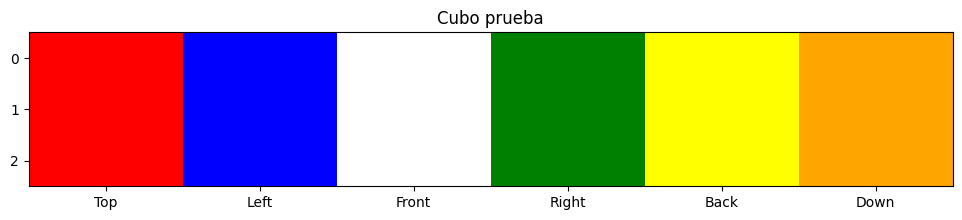

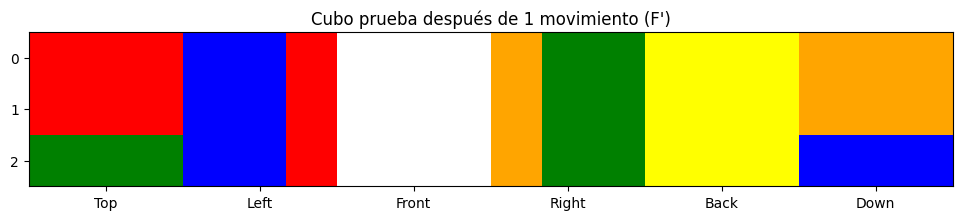

In [12]:
mostrar(cuboArmado,"Cubo prueba")
mostrar(Fizq(cuboArmado),"Cubo prueba después de 1 movimiento (F')")

<ipython-input-10-b424f547df52>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(18, 2))


KeyboardInterrupt: ignored

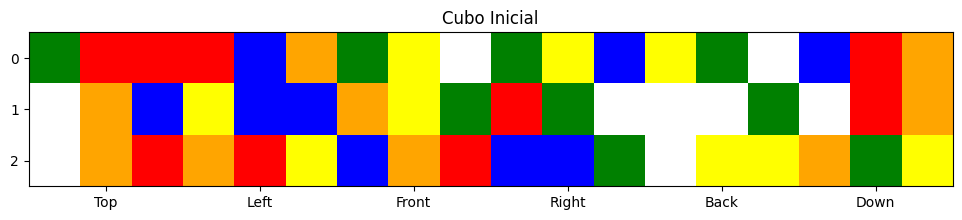

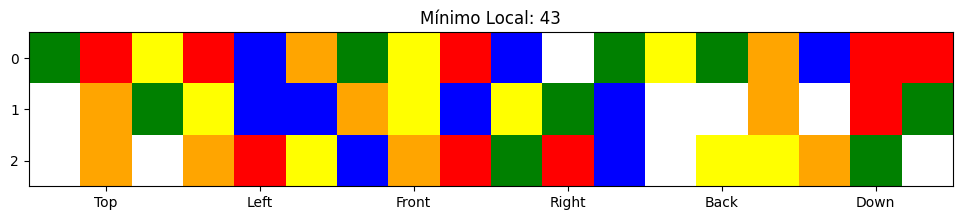

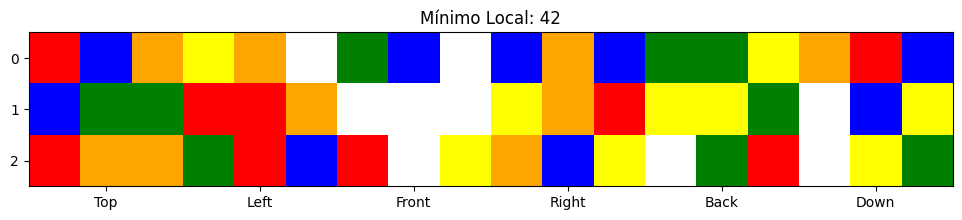

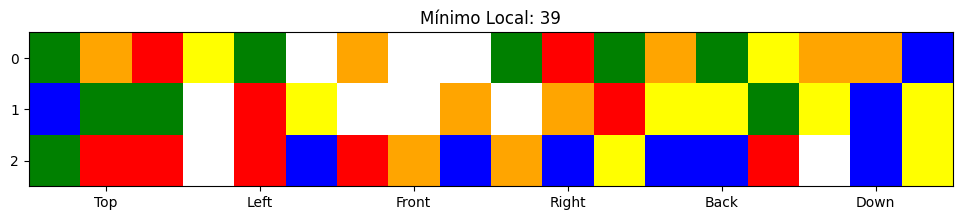

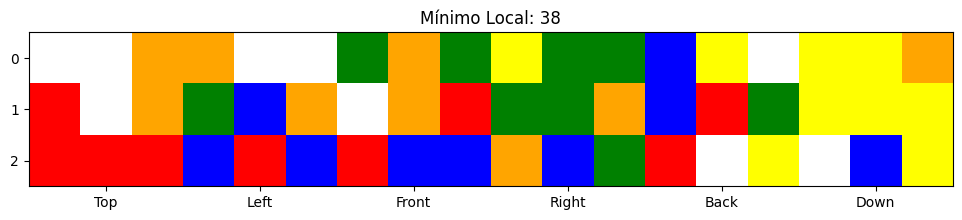

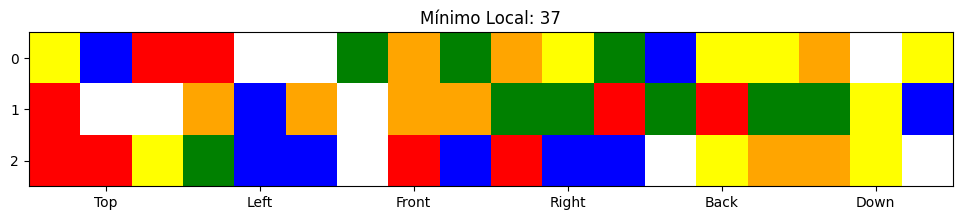

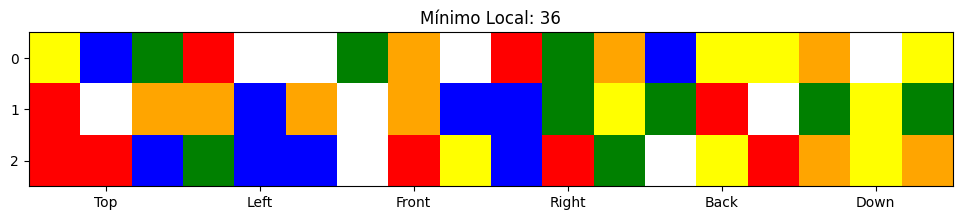

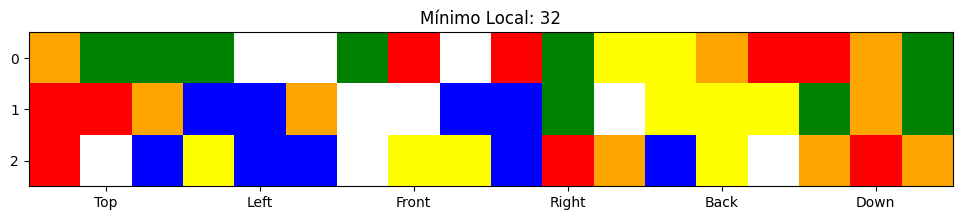

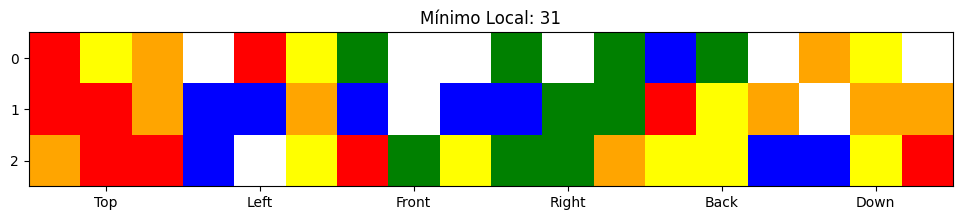

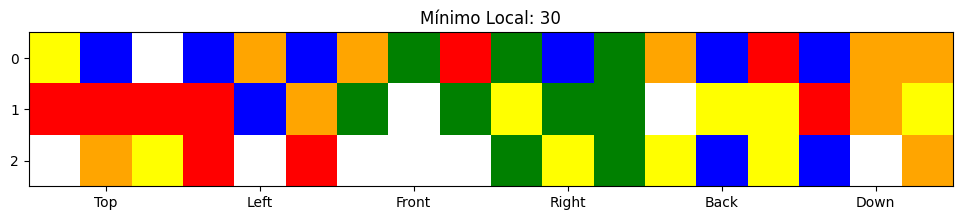

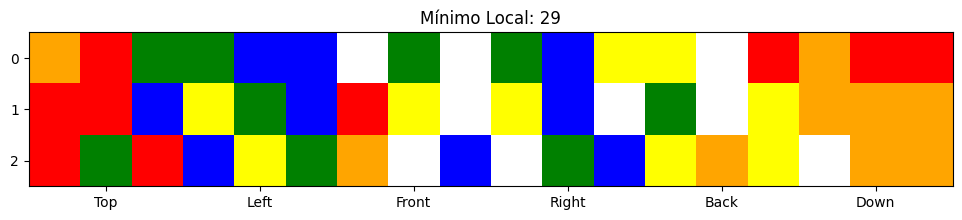

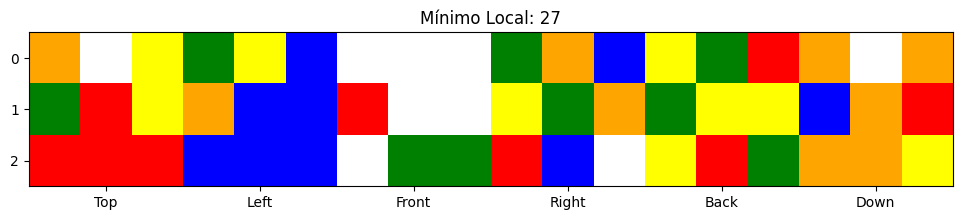

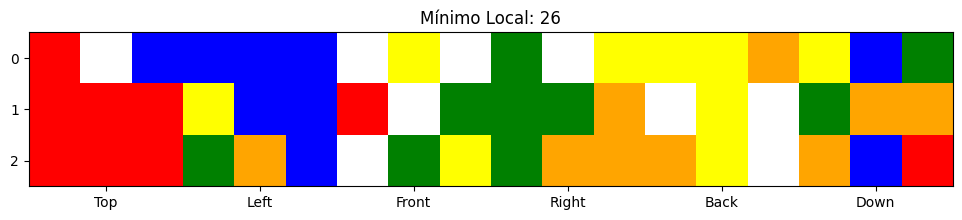

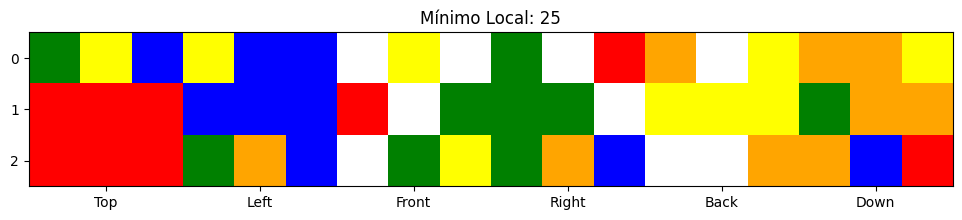

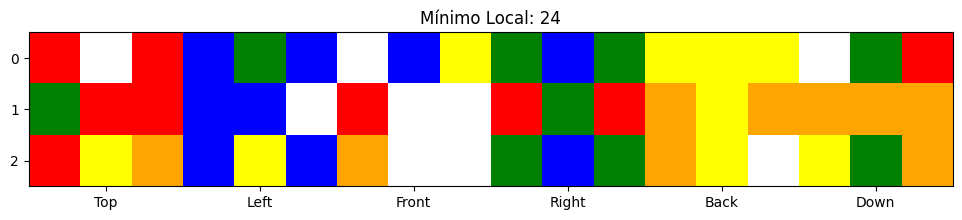

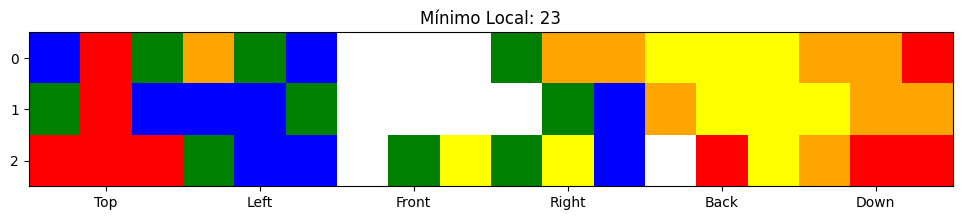

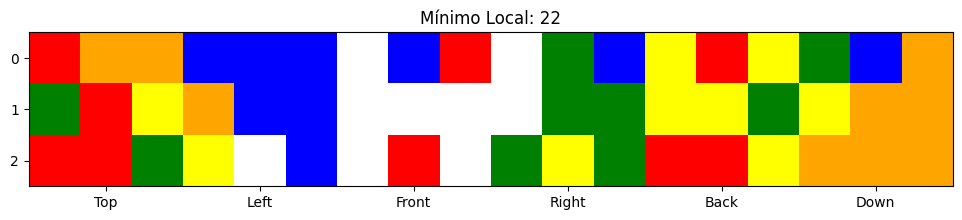

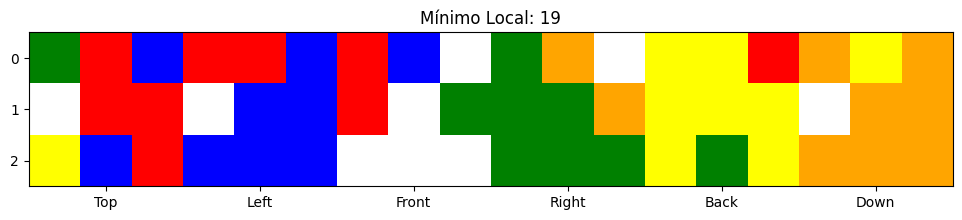

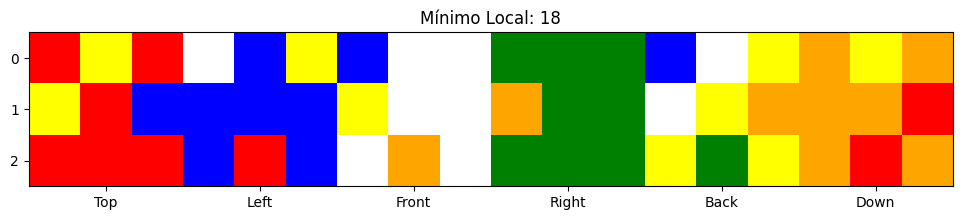

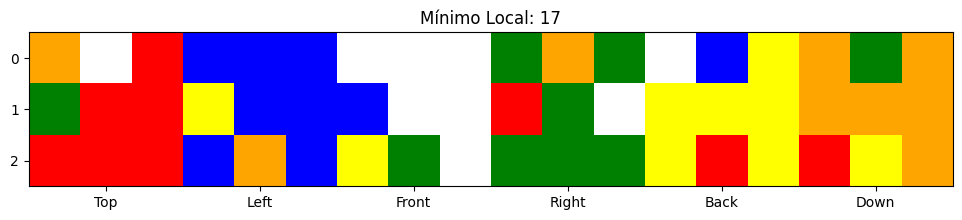

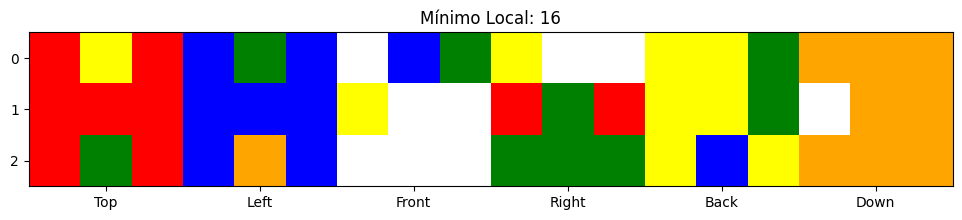

In [32]:
# KeyboardInterrupt pues no termina el algoritmo de resolver el cubo de 3x3
cuboArmado=np.array([[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]])
simulatedAnnealing(revolver(cuboArmado),energia2)

# Cubo de Rubik 2x2

In [14]:
# Rotaciones
# Operaciones básicas
def Fder2(M):
  aux=M[1,0],M[1,1],M[0,4]
  M[1,0],M[1,1],M[0,4] = M[0,6],M[1,6],M[0,5]
  M[0,6],M[1,6],M[0,5] = M[1,11],M[1,10],M[1,5]
  M[1,11],M[1,10],M[1,5] = M[1,3],M[0,3],M[1,4]
  M[1,3],M[0,3],M[1,4] = aux
  return M

def Fizq2(M):
  aux=M[1,0],M[1,1],M[0,4]
  M[1,0],M[1,1],M[0,4] =  M[1,3],M[0,3],M[1,4]
  M[1,3],M[0,3],M[1,4] = M[1,11],M[1,10],M[1,5]
  M[1,11],M[1,10],M[1,5] = M[0,6],M[1,6],M[0,5]
  M[0,6],M[1,6],M[0,5] = aux
  return M

def Uizq2(M):
  aux=M[0,4],M[0,5],M[1,0]
  M[0,4],M[0,5],M[1,0] = M[0,2],M[0,3],M[0,0]
  M[0,2],M[0,3],M[0,0] = M[0,9],M[0,8],M[0,1]
  M[0,9],M[0,8],M[0,1] = M[0,6],M[0,7],M[1,1]
  M[0,6],M[0,7],M[1,1] = aux
  return M

def Uder2(M):
  aux=M[0,4],M[0,5],M[1,0]
  M[0,4],M[0,5],M[1,0] = M[0,6],M[0,7],M[1,1]
  M[0,6],M[0,7],M[1,1] = M[0,9],M[0,8],M[0,1]
  M[0,9],M[0,8],M[0,1] = M[0,2],M[0,3],M[0,0]
  M[0,2],M[0,3],M[0,0] = aux
  return M

def Bizq2(M):
  aux=M[0,0],M[0,1],M[0,8]
  M[0,0],M[0,1],M[0,8] = M[1,2],M[0,2],M[1,8]
  M[1,2],M[0,2],M[1,8] = M[0,11],M[0,10],M[1,9]
  M[0,11],M[0,10],M[1,9] = M[0,7],M[1,7],M[0,9]
  M[0,7],M[1,7],M[0,9] = aux
  return M

def Bder2(M):
  aux=M[0,0],M[0,1],M[0,8]
  M[0,0],M[0,1],M[0,8] = M[0,7],M[1,7],M[0,9]
  M[0,7],M[1,7],M[0,9] = M[0,11],M[0,10],M[1,9]
  M[0,11],M[0,10],M[1,9] = M[1,2],M[0,2],M[1,8]
  M[1,2],M[0,2],M[1,8] = aux
  return M

def Dizq2(M):
  aux=M[1,4],M[1,5],M[1,10]
  M[1,4],M[1,5],M[1,10] = M[1,2],M[1,3],M[0,10]
  M[1,2],M[1,3],M[0,10] = M[1,9],M[1,8],M[0,11]
  M[1,9],M[1,8],M[0,11] = M[1,6],M[1,7],M[1,11]
  M[1,6],M[1,7],M[1,11] = aux
  return M

def Dder2(M):
  aux=M[1,4],M[1,5],M[1,10]
  M[1,4],M[1,5],M[1,10] = M[1,6],M[1,7],M[1,11]
  M[1,6],M[1,7],M[1,11] = M[1,9],M[1,8],M[0,11]
  M[1,9],M[1,8],M[0,11] = M[1,2],M[1,3],M[0,10]
  M[1,2],M[1,3],M[0,10] = aux
  return M

def Larr2(M):
  aux=M[0,4],M[1,4],M[1,3]
  M[0,4],M[1,4],M[1,3] = M[0,0],M[1,0],M[0,3]
  M[0,0],M[1,0],M[0,3] = M[1,8],M[0,8],M[0,2]
  M[1,8],M[0,8],M[0,2] = M[1,10],M[0,10],M[1,2]
  M[1,10],M[0,10],M[1,2] = aux
  return M

def Lab2(M):
  aux=M[0,4],M[1,4],M[1,3]
  M[0,4],M[1,4],M[1,3] = M[1,10],M[0,10],M[1,2]
  M[1,10],M[0,10],M[1,2] = M[1,8],M[0,8],M[0,2]
  M[1,8],M[0,8],M[0,2] = M[0,0],M[1,0],M[0,3]
  M[0,0],M[1,0],M[0,3] = aux
  return M

def Rarr2(M):
  aux=M[0,5],M[1,5],M[0,6]
  M[0,5],M[1,5],M[0,6] = M[0,1],M[1,1],M[0,7]
  M[0,1],M[1,1],M[0,7] = M[1,9],M[0,9],M[1,7]
  M[1,9],M[0,9],M[1,7] = M[1,11],M[0,11],M[1,6]
  M[1,11],M[0,11],M[1,6] = aux
  return M

def Rab2(M):
  aux=M[0,5],M[1,5],M[0,6]
  M[0,5],M[1,5],M[0,6] = M[1,11],M[0,11],M[1,6]
  M[1,11],M[0,11],M[1,6] = M[1,9],M[0,9],M[1,7]
  M[1,9],M[0,9],M[1,7] = M[0,1],M[1,1],M[0,7]
  M[0,1],M[1,1],M[0,7] = aux
  return M

movimientos2=[Fizq2,Fder2,Uizq2,Uder2,Larr2,Lab2]

In [15]:
cuboArmado2=np.array([[1,1,2,2,3,3,4,4,5,5,6,6],[1,1,2,2,3,3,4,4,5,5,6,6]])

In [16]:
#revuelve un cubo
def revolver2(cubo):
  resultado=cubo
  for i in range(40):
    resultado=movimientos2[r.randint(0,5)](resultado)
  return resultado

#Elige una de los 6 movimientos posibles
def movimientoRandom2(cubo):
  resultado=movimientos2[r.randint(0,5)](cubo)
  return resultado

In [17]:
# Función para armar el cubo mediante simulated annealing
def simulatedAnnealing2(cubo,funcionObjetivo):
  mostrar2(cubo,"Cubo Inicial")
  inicio=time.time()
  resultado=cubo.copy()
  iteracion=0
  movimientos=0
  beta=0.01
  distancias=[]

  while (not funcionObjetivo(resultado)<0.001):
    iteracion+=1
    actual=resultado.copy()
    vecino=movimientoRandom2(actual)
    diferencia=funcionObjetivo(vecino)-funcionObjetivo(resultado)
    distancias.append(funcionObjetivo(resultado))

    if diferencia<=0:
      #Aceptar el vecino
      resultado=vecino.copy()
      movimientos+=1

    elif r.random() < np.e**(-1*beta*diferencia):
      #Aceptar el vecino
      resultado=vecino.copy()
      movimientos+=1

    beta=beta*10.73
    if beta>1000000:
      beta=0.001

  distancias.append(funcionObjetivo(resultado))
  print("¡Cubo Resuelto!")
  print("Iteraciones del Algoritmo: ",iteracion)
  print("Movimientos: ",movimientos)
  final=time.time()
  print("Tiempo: ",int(final-inicio), " s")
  mostrar2(resultado,"Cubo Resuelto")

  return(resultado,int(final-inicio),movimientos,iteracion,distancias)

In [18]:
# Definir funciones de energía (2 posibles)
def energia3(cubo):
  valor=0
  for i in range(6):
    for j in range(2):
      for k in range(2):
        if not cubo[j][k+2*i]==i+1:
          valor+=1
  return valor

def energia4(cubo):
  valor=0
  for i in range(6):
    aux=[]
    for j in range(2):
      for k in range(2):
        aux.append(cubo[j][k+2*i])
    valor+=np.var(aux)
  return valor

In [19]:
# Función para ver el cubo
def mostrar2(cubo,titulo):
  fig, ax = plt.subplots(figsize=(12, 2))
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","blue","white","green","yellow","orange"])
  ax.imshow(cubo, alpha=1,cmap=cmap)
  ax.set_title(titulo)
  caras = ["Top", "Left", "Front", "Right","Back","Down"]
  ax.set_xticks([0.5,2.5,4.5,6.5,8.5,10.5])
  ax.set_xticklabels(caras)

Cubo Resuelto
Iteraciones del Algoritmo:  68470
Movimientos:  39230
Tiempo:  6  s


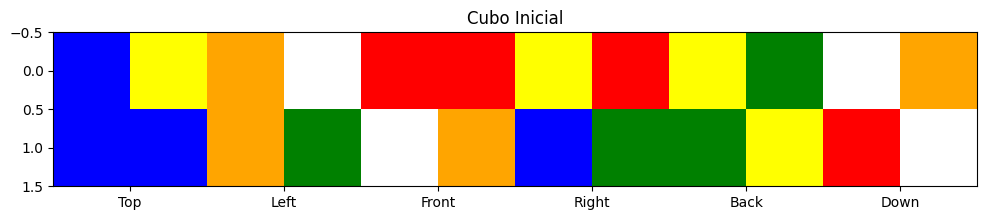

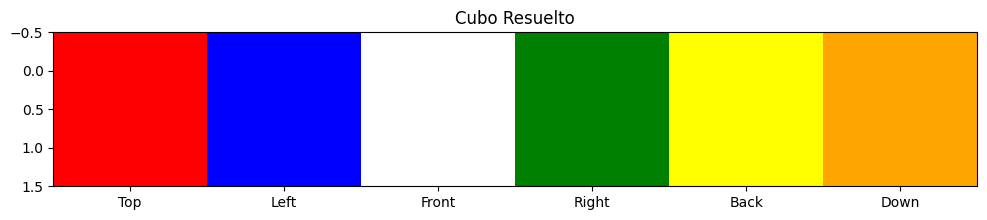

In [21]:
cuboArmado=np.array([[1,1,2,2,3,3,4,4,5,5,6,6],[1,1,2,2,3,3,4,4,5,5,6,6]])
sim=simulatedAnnealing2(revolver2(cuboArmado),energia3)

Cantidad de iteraciones: 68470


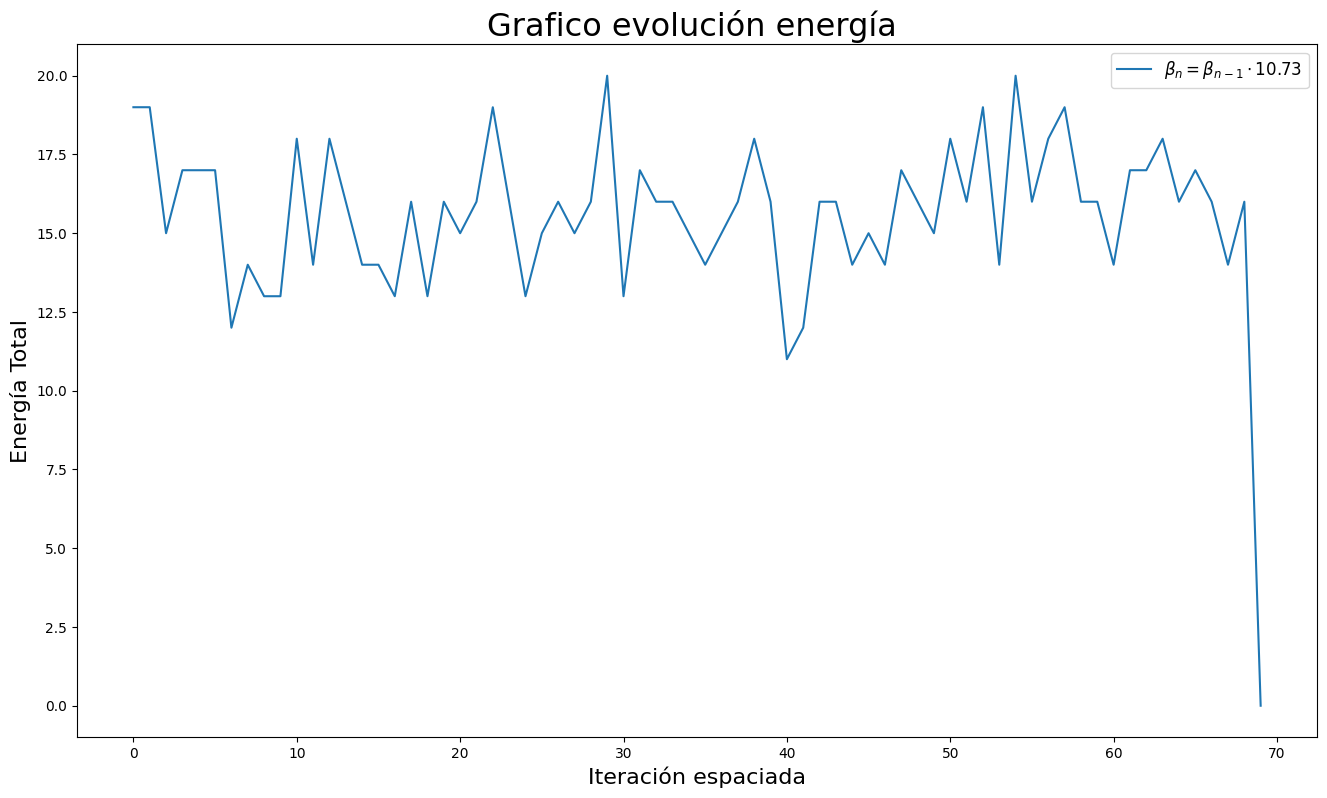

In [23]:
# Graficar evolución de energía (el eje x posee saltos para visalizar mejor)
y=sim[4][0::1000]+[sim[4][-1]]
print('Cantidad de iteraciones:', len(sim[4])-1)
x = np.arange(0, len(y), 1)
fig, ax = plt.subplots(figsize=(16,9))
plt.xlabel('Iteración espaciada',fontsize=16)
plt.ylabel('Energía Total',fontsize=16)
plt.title("Grafico evolución energía ",fontsize=23)
ax.plot(x, y , label=r'$\beta_n=\beta_{n-1} \cdot 10.73$')
ax.legend(fontsize=12)
plt.show()